In [1]:
import pandas as pd
import sklearn as skl
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
amd_file = "https://raw.githubusercontent.com/dany-roman/project_4_stock_analysis/main/test_data/test_amd.csv"
stock = pd.read_csv(amd_file)
stock_df = pd.DataFrame(stock)
stock_df.fillna(0)

,High-Low Price,Close-Open Price,7-day m_avg,14-day m_avg,21-day m_avg,7-day m_std,close
0,0.629999,0.010000,0.629999,0.629999,0.629999,0.000000,11.430000
1,0.280001,-0.020000,0.455000,0.455000,0.455000,0.000000,11.430000
2,0.460000,-0.190001,0.456667,0.456667,0.456667,0.109697,11.240000
3,0.380000,0.030000,0.437500,0.437500,0.437500,0.092557,11.320000
4,0.330000,0.120000,0.416000,0.416000,0.416000,0.100350,11.490000
...,...,...,...,...,...,...,...
1002,1.200005,0.009995,2.527143,2.815714,3.009048,2.298816,91.809998
1003,2.320000,-1.330002,2.600001,2.836429,3.009048,2.138821,91.599998
1004,3.029999,-1.040001,2.794286,2.850000,3.075238,1.749579,90.620003
1005,2.659996,1.510002,2.585714,2.644286,2.906190,0.934162,92.290001


In [3]:
X = stock_df.drop('close', axis=1)
y = stock_df['close']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
# X_train = np.asarray(X_train)
# X_test = np.asarray(X_test)
# y_train = np.asarray(y_train)
# y_test = np.asarray(y_test)

In [5]:
# # Create scaler instance
# X_scaler = skl.preprocessing.StandardScaler()

# # Fit the scaler
# X_scaler.fit(X_train)

# # Scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=6))

# Add our second Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="mean_squared_error", optimizer="adam", metrics=[tf.metrics.RSquare()])
nn_model.summary()

AttributeError: module 'keras.api._v2.keras.metrics' has no attribute 'RSquare'

In [148]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train, y_train, epochs=100)

Epoch 1/100


ValueError: ignored

In [118]:
# # # Plot the accuracy
# # stock_df.plot(y="accuracy")

# # Evaluate the model using the test data
# model_loss, model_accuracy = nn_model.evaluate(X_test,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [128]:
predictions = nn_model.predict(X_test)
fl_pred = [item for elem in predictions for item in elem]
pred = {
    "Actual Close": y_test,
    "Predicted Close": fl_pred
}
pred_df = pd.DataFrame(pred)

In [129]:
# pred_df = pred_df.reset_index()
pred_df

,Actual Close,Predicted Close
522,24.410000,36.300770
928,78.980003,92.248421
792,44.009998,65.809868
960,82.230003,61.898579
614,31.389999,31.274397
...,...,...
613,32.180000,30.465668
120,14.080000,20.000128
364,16.250000,19.252459
403,19.100000,19.700596


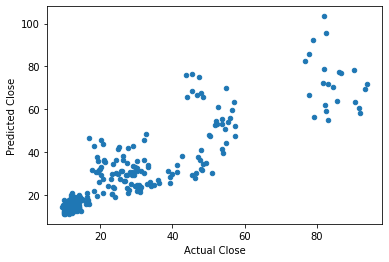

In [130]:
pred_df.plot.scatter(x='Actual Close',y='Predicted Close')

In [141]:
pred_df.sort_index(inplace=True)
pred_df.reset_index(inplace=True)

ValueError: ignored

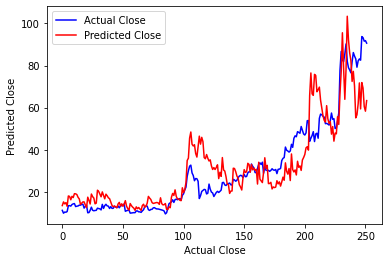

In [144]:
plt.plot(pred_df.index.values,pred_df['Actual Close'], c='b', label='Actual Close')
plt.plot(pred_df.index.values,pred_df['Predicted Close'], c='r', label='Predicted Close')

plt.legend()
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.show()